In this demo, we follow [Tyler Sloan](https://quorumetrix.blogspot.com/2018/06/visualizing-lidar-data-with-datashader.html)'s walkthrough where he downloads LiDAR data from the City of Montreal (featuring the 1976 Olympic Stadium) and visualize it ([original notebook here](https://github.com/tsloan1377/montreal_open_data/blob/master/lidar_datashader_blog.ipynb)).

This notebook depends on the LAStools for working with LiDAR - we only really need the LASzip tool, but we've installed the entire suite. You can see what other tools are available from the filemanager in the [LAStools/bin](Lastools/bin) directory.

## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
import imageio
from laspy.file import File
import datashader as ds
import datashader.transfer_functions as tf
from matplotlib import cm

We use `curl` to get the `.laz`, the compressed lidar data from the city of Montreal which we save as mtl.lz

In [1]:
!curl http://depot.ville.montreal.qc.ca/geomatique/lidar_aerien/2015/300-5046_2015.laz > mtl.laz
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67.8M  100 67.8M    0     0  14.0M      0  0:00:04  0:00:04 --:--:-- 15.1M 0:00:04  0:00:01 12.9M


Now we need to make the LASzip file executable; you'll need to do this to the other tools individually if you wish to use any of the other tools in that bin, by the way.

In [6]:
!chmod 755 LAStools/bin/laszip

Now we unzip the lidar data, specifying the input and outputs:

In [23]:
!LAStools/bin/laszip -i SU1477_P_8065_20120113_20120113.laz -o avebury.las

## Load LIDAR file with LasPy

In [24]:
sample_data = 'avebury.las'
export_path = 'export//'

In [25]:
inFile = File(sample_data, mode='r')
df = pd.DataFrame() 
df['X'] = inFile.X 
df['Y'] = inFile.Y 
df['Z'] = inFile.Z
df['class'] = inFile.classification
display(df)

X         Y      Z  class
0       41468781  17785233  17511      2
1       41468716  17785165  17517      3
2       41468734  17785159  17522      3
3       41468793  17785220  17512      1
4       41469044  17785222  17505      2
5       41468980  17785156  17515      3
6       41468912  17785083  17507      2
7       41468847  17785016  17514      1
8       41468853  17784998  17511      2
9       41468914  17785062  17511      2
10      41468977  17785128  17514      3
11      41469038  17785192  17514      3
12      41469312  17785213  17512      1
13      41469244  17785142  17508      2
14      41469178  17785073  17508      2
15      41469113  17785004  17511      2
16      41469046  17784935  17512      8
17      41468980  17784866  17513      2
18      41468984  17784849  17515      2
19      41469045  17784912  17512      2
20      41469107  17784976  17511      2
21      41469167  17785039  17508      2
22      41469230  17785104  17511      1
23      41469291  17785169  17509      8
24      41469354  17785235  17514      3
25      41469586  17785216  17504      2
26      41469519  17785144  17499      8
27      41469456  17785080  17513      3
28      41469388  17785008  17507      2
29      41469323  17784941  17514      1
...          ...       ...    ...    ...
850032  41499857  17755556  18138      2
850033  41499914  17755615  18138      2
850034  41499972  17755674  18135      2
850035  41500000  17755624  18137      2
850036  41499942  17755565  18137      2
850037  41499884  17755507  18141      2
850038  41499827  17755447  18140      2
850039  41499769  17755388  18142      2
850040  41499710  17755328  18149      3
850041  41499653  17755270  18146      2
850042  41499595  17755211  18150      1
850043  41499538  17755152  18148      2
850044  41499480  17755093  18150      2
850045  41499423  17755035  18152      2
850046  41499632  17755061  18150      2
850047  41499689  17755119  18153      8
850048  41499748  17755178  18148      2
850049  41499805  17755237  18145      2
850050  41499862  17755295  18147      1
850051  41499921  17755355  18141      2
850052  41499980  17755413  18139      2
850053  41499992  17755346  18140      2
850054  41499934  17755287  18144      2
850055  41499875  17755228  18148      3
850056  41499819  17755170  18142      8
850057  41499761  17755110  18149      2
850058  41499702  17755051  18154      8
850059  41499906  17755054  18151      8
850060  41499965  17755114  18144      8
850061  41499987  17755065  18147      2

[850062 rows x 4 columns]

## Plot the tile using datashader

/srv/conda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


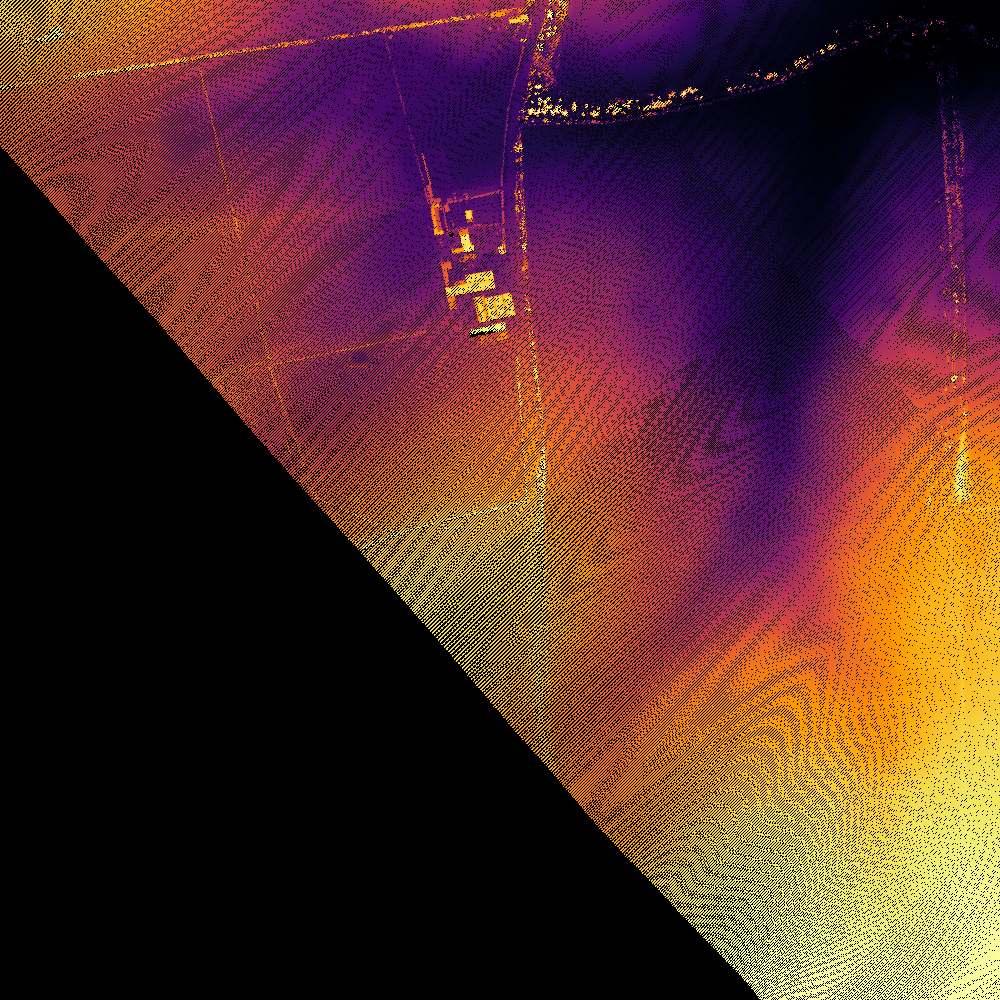

In [26]:
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(df, 'X', 'Y', ds.mean('Z'))
img = tf.shade(agg)#, cmap=['lightblue', 'darkblue'], how='log')
tf.set_background(tf.shade(agg, cmap=cm.inferno),"black")

## Separate the different classes of pixel

/srv/conda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


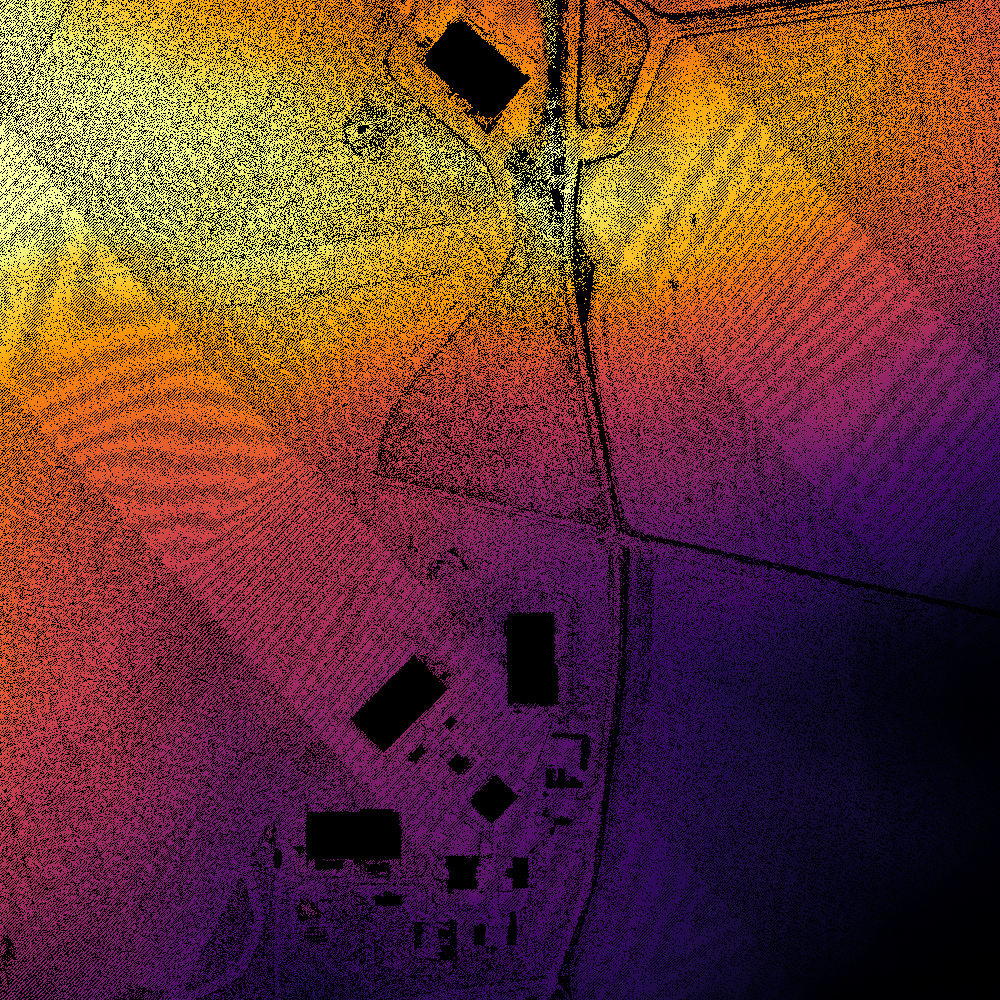

In [21]:
# Create a dataframe containing only the lidar voxels for buildings.
class_df = df.loc[df['class'] == 2]

# Visualize with datashader
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(class_df, 'X', 'Y', ds.mean('Z'))
img = tf.shade(agg)#, how='log')
tf.set_background(tf.shade(agg, cmap=cm.inferno),"black")

/srv/conda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


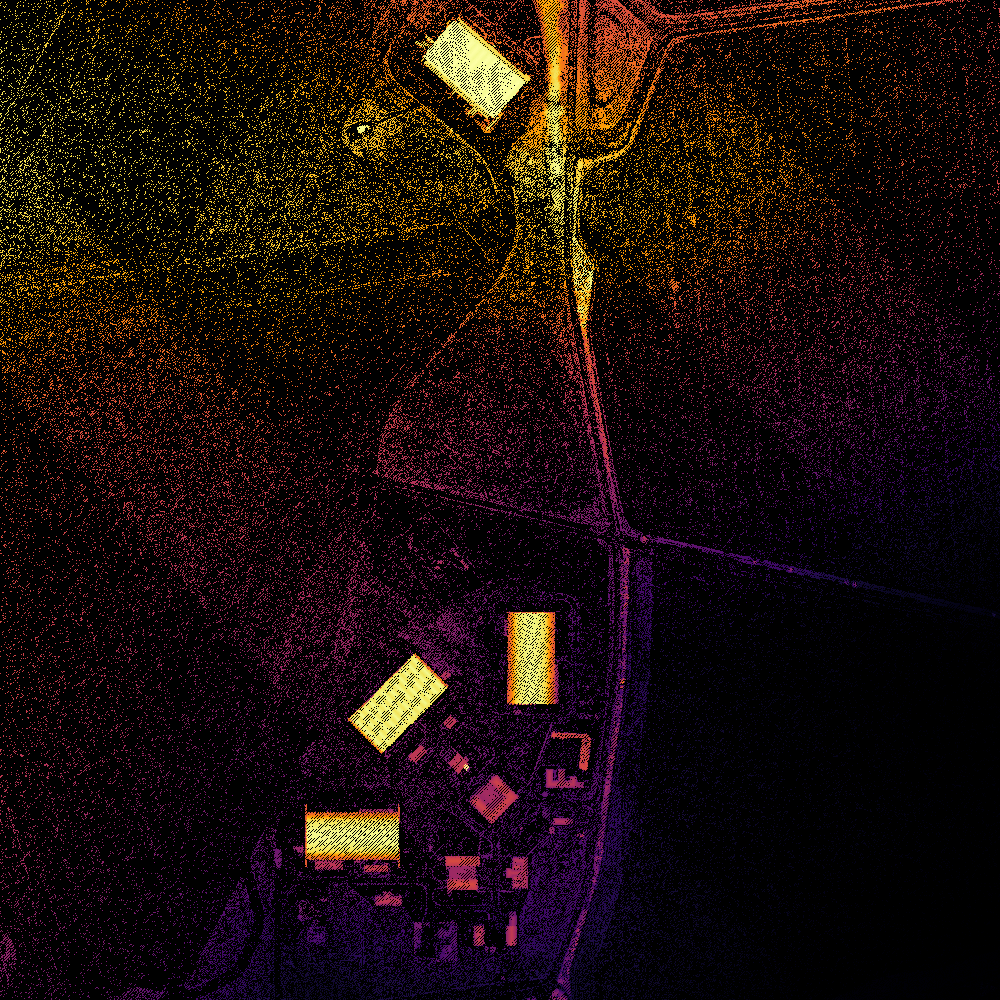

In [22]:
# Combine multiple classes of voxels that contain levels of vegetation
veg_df = df.loc[(df['class'] > 2) & (df['class'] < 6)]

# Visualize with datashader
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(veg_df, 'X', 'Y', ds.mean('Z'))
img = tf.shade(agg)#, how='log')
tf.set_background(tf.shade(agg, cmap=cm.inferno),"black")

## Create a 3D surface visualization

In [ ]:
# Use entire image containing olympic stadium, etc.
X = df['X']
Y = df['Y']
Z = df['Z']

# Downsample x and y
ds_factor = 500
ds_x = X[::ds_factor] 
ds_y = Y[::ds_factor] 
ds_z = Z[::ds_factor] 

##### Export the gif
frames = []
identifier = 'bigO_tile_downsample_' + str(ds_factor) + 'x_surface_lidar'  

if not os.path.exists(export_path):
    os.makedirs(export_path)

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_trisurf(ds_x, ds_y, ds_z, cmap=cm.inferno,
                       linewidth=0, antialiased=False)

for angle in range(0, 360):
    ax.view_init(60, angle) # Higher angle than usually used of 30.
    ax.set_axis_off()

    # Draw the figure
    fig.canvas.draw()

    # Convert to numpy array, and append to list
    np_fig = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    np_fig = np_fig.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(np_fig)

imageio.mimsave(export_path + identifier + '.gif', frames)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
